# Exponential Learning

In [1]:
# Uncomment the following line when running on Google Colab
# !pip install "autora"

The exponential learning experiment has to be initialized with a specific formula and effects.

In [2]:
import numpy as np
from autora.experiment_runner.synthetic.psychology.exp_learning import exp_learning

s = exp_learning()

Check the docstring to get information about the model

In [3]:
help(exp_learning)

Help on SyntheticExperimentCollection in module autora.experiment_runner.synthetic.utilities object:

class SyntheticExperimentCollection(builtins.object)
 |  SyntheticExperimentCollection(name: 'Optional[str]' = None, description: 'Optional[str]' = None, params: 'Optional[Dict]' = None, variables: 'Optional[VariableCollection]' = None, domain: 'Optional[Callable]' = None, run: 'Optional[Callable]' = None, ground_truth: 'Optional[Callable]' = None, plotter: 'Optional[Callable[[Optional[_SupportsPredict]], None]]' = None, factory_function: 'Optional[_SyntheticExperimentFactory]' = None) -> None
 |  
 |  Represents a synthetic experiment.
 |  
 |  Attributes:
 |      name: the name of the theory
 |      params: a dictionary with the settable parameters of the model and their respective values
 |      variables: a VariableCollection describing the variables of the model
 |      domain: a function which returns all the available X values for the model
 |      run: a function which takes X 

... or use the describe function:

In [4]:
from autora.experiment_runner.synthetic.utilities import describe

print(describe(s))


    Exponential Learning

    Args:
        p_asymptotic: additive bias on constant multiplier
        lr: learning rate
        maximum_initial_value: upper bound for initial p value
        minimum_initial_value: lower bound for initial p value
        minimum_trial: upper bound for exponential constant
        name: name of the experiment
        resolution: number of allowed values for stimulus
        Examples:
        >>> s = exp_learning()
        >>> s.run(np.array([[.2,.1]]), random_state=42)
           P_asymptotic  trial  performance
        0           0.2    0.1     0.205444
    


The synthetic experiement `s` has properties like the name of the experiment:

In [5]:
s.name

'Exponential Learning'

... a valid variables description:

In [6]:
s.variables

VariableCollection(independent_variables=[IV(name='P_asymptotic', value_range=(0, 0.5), allowed_values=array([0.        , 0.00505051, 0.01010101, 0.01515152, 0.02020202,
       0.02525253, 0.03030303, 0.03535354, 0.04040404, 0.04545455,
       0.05050505, 0.05555556, 0.06060606, 0.06565657, 0.07070707,
       0.07575758, 0.08080808, 0.08585859, 0.09090909, 0.0959596 ,
       0.1010101 , 0.10606061, 0.11111111, 0.11616162, 0.12121212,
       0.12626263, 0.13131313, 0.13636364, 0.14141414, 0.14646465,
       0.15151515, 0.15656566, 0.16161616, 0.16666667, 0.17171717,
       0.17676768, 0.18181818, 0.18686869, 0.19191919, 0.1969697 ,
       0.2020202 , 0.20707071, 0.21212121, 0.21717172, 0.22222222,
       0.22727273, 0.23232323, 0.23737374, 0.24242424, 0.24747475,
       0.25252525, 0.25757576, 0.26262626, 0.26767677, 0.27272727,
       0.27777778, 0.28282828, 0.28787879, 0.29292929, 0.2979798 ,
       0.3030303 , 0.30808081, 0.31313131, 0.31818182, 0.32323232,
       0.32828283, 0.33333

... now we can generate the full domain of the data

In [7]:
x = s.domain()
x

array([[  0. ,   1. ],
       [  0. ,   2. ],
       [  0. ,   3. ],
       ...,
       [  0.5,  98. ],
       [  0.5,  99. ],
       [  0.5, 100. ]])

... the experiment_runner which can be called to generate experimental results:

In [8]:
experiment_data = s.run(x)
experiment_data

,P_asymptotic,trial,performance
0,0.0,1.0,0.036016
1,0.0,2.0,0.068082
2,0.0,3.0,0.085388
3,0.0,4.0,0.112860
4,0.0,5.0,0.130249
...,...,...,...
9995,0.5,96.0,0.990840
9996,0.5,97.0,0.976043
9997,0.5,98.0,0.972922
9998,0.5,99.0,0.969821


... a function to plot the ground truth (no noise):

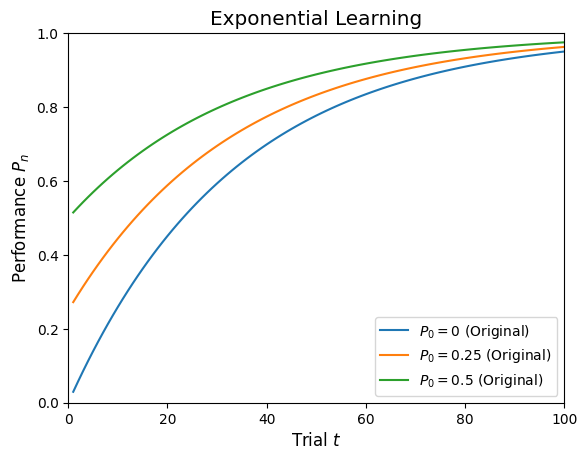

In [9]:
s.plotter()

... against a fitted model if it exists:

/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/younesstrittmatter/Documents/GitHub/AutoRA/autora-synthetic/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


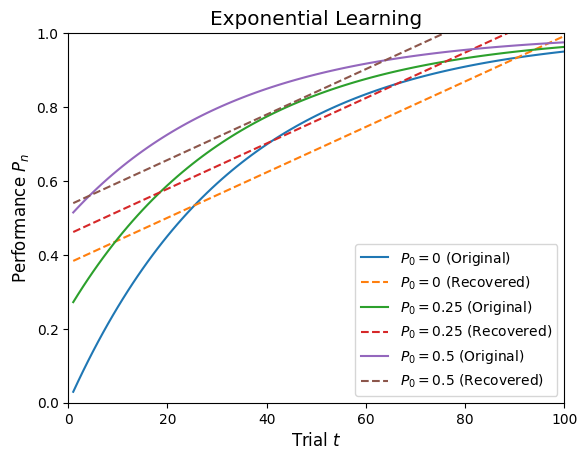

In [10]:
from sklearn.linear_model import LinearRegression
ivs = [iv.name for iv in s.variables.independent_variables]
dvs = [dv.name for dv in s.variables.dependent_variables]
X = experiment_data[ivs]
y = experiment_data[dvs]
model = LinearRegression().fit(X, y)
s.plotter(model)

We can wrap this functions to use with the state logic of AutoRA:
First, we create the state with the variables:

In [11]:
from autora.state import StandardState, on_state, experiment_runner_on_state, estimator_on_state
from autora.experimentalist.grid import grid_pool
from autora.experimentalist.random import random_sample

# We can get the variables from the runner
variables = s.variables

# With the variables, we initialize a StandardState
state = StandardState(variables)

Wrap the experimentalists in `on_state` function to use them on state:

In [12]:
# Wrap the functions to use on state
# Experimentalists:
pool_on_state = on_state(grid_pool, output=['conditions'])
sample_on_state = on_state(random_sample, output=['conditions'])

state = pool_on_state(state)
state = sample_on_state(state, num_samples=2)
print(state.conditions)

      P_asymptotic  trial
8380      0.419192   81.0
2670      0.131313   71.0


Wrap the runner with the `experiment_runner_on_state` wrapper to use it on state:

In [13]:
# Runner:
run_on_state = experiment_runner_on_state(s.run)
state = run_on_state(state)

state.experiment_data

,P_asymptotic,trial,performance
8380,0.419192,81.0,0.955751
2670,0.131313,71.0,0.892922


Wrap the regressor with the `estimator_on_state` wrapper:

In [17]:
theorist = LinearRegression()
theorist_on_state = estimator_on_state(theorist)

state = theorist_on_state(state)
# Access the last model:
model = state.models[-1]


print(f"performance = "
      f"{model.coef_[0][0]:.2f}*P_asymptotic "
      f"{model.coef_[0][1]:.2f}*trial "
      f"{model.intercept_[0]:+.2f} ")

performance = 0.00*P_asymptotic 0.01*trial +0.45 
